In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [2]:
AwanTunai_data = pd.read_excel('20220413_Northeastern_AwanTunai_Capstone_Data.xlsx', keep_default_na = 'TRUE')

In [3]:
AwanTunai_data.head()

,id,order_id,merchant_id,sku_id,date,top_cat_id,sub_cat_id,price
0,654713,82186,1754,981,2021-06-29,7.0,44.0,877000.0
1,654712,82186,1754,23060,2021-06-29,7.0,44.0,877000.0
2,654711,82186,1754,1548,2021-06-29,7.0,44.0,877000.0
3,654714,82186,1754,1969,2021-06-29,7.0,44.0,877000.0
4,654687,82186,1754,343,2021-06-29,7.0,44.0,312000.0


In [4]:
AwanTunai_data.isna().sum()

id                0
order_id          0
merchant_id       0
sku_id            0
date              0
top_cat_id     2208
sub_cat_id     2208
price             0
dtype: int64

In [5]:
na_AwanTunai_data = AwanTunai_data[AwanTunai_data["top_cat_id"].isna()]
AwanTunai_data = AwanTunai_data.dropna(subset=["top_cat_id"])

In [6]:
AwanTunai_data.isna().sum()

id             0
order_id       0
merchant_id    0
sku_id         0
date           0
top_cat_id     0
sub_cat_id     0
price          0
dtype: int64

In [7]:
print(AwanTunai_data.dtypes) 

id                      int64
order_id                int64
merchant_id             int64
sku_id                  int64
date           datetime64[ns]
top_cat_id            float64
sub_cat_id            float64
price                 float64
dtype: object


In [8]:
AwanTunai_data["order_id"] = pd.Categorical(AwanTunai_data.order_id)
AwanTunai_data["sku_id"] = pd.Categorical(AwanTunai_data.sku_id)
AwanTunai_data["count"] = 1 

In [9]:
Order_SKU = AwanTunai_data[['sku_id', 'order_id', 'count']]

In [10]:
print(Order_SKU.dtypes) 

sku_id      category
order_id    category
count          int64
dtype: object


In [11]:
print(Order_SKU.nunique())

sku_id       714
order_id    2563
count          1
dtype: int64


In [12]:
# Transactions done in 
baskets = Order_SKU.groupby(['order_id'])['sku_id'].apply(list).values.tolist()

In [13]:
baskets

[[400],
 [16065, 720, 5337],
 [400],
 [400],
 [400],
 [400],
 [354, 4382, 16065, 720, 400, 2392],
 [400],
 [3201, 354, 15994],
 [16057],
 [1853],
 [15964, 5338, 1853, 15143, 15997, 15993],
 [2295, 2317],
 [1853, 2392],
 [400],
 [400],
 [1853],
 [1853],
 [1767],
 [1853],
 [1853, 2, 5548, 1767, 1767],
 [15141, 1679],
 [5338],
 [1767],
 [3, 5338, 3201, 1853, 15143, 15997, 1679, 4657, 816],
 [317, 14765, 2037, 15994, 15824, 15831, 1767, 1767, 16292, 1679, 5340, 1204],
 [317, 2392],
 [317, 5338, 1925, 15997, 15993, 15996, 5337],
 [317, 1233, 354, 720, 1767, 15830, 15829, 1679, 16313],
 [1925, 678, 15996, 816, 1048],
 [317, 1233, 1767],
 [317, 1925, 678, 1679],
 [16281, 2740],
 [354, 2037],
 [1233],
 [1233, 1767],
 [2037, 1767, 289],
 [4505],
 [1233, 15994, 1767, 96, 65, 816, 2392],
 [96],
 [1853],
 [4505, 5338, 15994, 15829],
 [218, 4505, 2037, 1853, 2, 1767, 1767, 1679, 16112, 1204],
 [16281, 2037],
 [2037],
 [16116, 16281, 15997, 96, 16124, 2740],
 [16134],
 [1853, 96],
 [354, 2037, 1853,

In [14]:
Order_SKU_table = Order_SKU.groupby("sku_id").sum().sort_values("count", ascending=False).reset_index()
Order_SKU_table.head(10).style.background_gradient(subset='count')

,sku_id,count
0,2037,433
1,360,404
2,8,397
3,468,354
4,1558,291
5,14766,265
6,33,252
7,2740,230
8,1767,222
9,1204,222


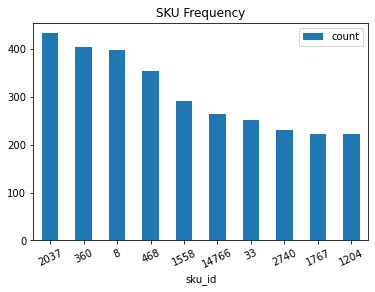

In [15]:
Order_SKU_table.head(10).plot(x="sku_id", y="count", kind="bar", title="SKU Frequency")
plt.xticks(rotation = 25)
plt.show()

In [16]:
te = TransactionEncoder()
te_array = te.fit(baskets).transform(baskets)
baskets_df = pd.DataFrame(te_array, columns=te.columns_)

In [17]:
baskets_df

,0,1,2,3,4,8,9,15,18,20,...,23595,23618,23619,23627,23654,23746,23747,23748,23749,23756
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2559,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2560,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(baskets_df, min_support=0.01, use_colnames=True)
frequent_itemsets_ap['length'] = frequent_itemsets_ap['itemsets'].apply(lambda x: len(x))
frequent_itemsets_ap['support'] = frequent_itemsets_ap['support'].apply(lambda x: x*100)

In [19]:
frequent_itemsets_ap[(frequent_itemsets_ap['length'] == 1)].sort_values(by='support', ascending=False).head(10)\
[['itemsets', 'support']].style.background_gradient(axis=0, gmap=frequent_itemsets_ap['support'])

,itemsets,support
69,frozenset({2037}),16.504097
28,frozenset({360}),14.826375
36,frozenset({468}),13.811939
3,frozenset({8}),11.939134
60,frozenset({1558}),11.275849
111,frozenset({14766}),10.222396
77,frozenset({2740}),8.973859
57,frozenset({1204}),8.661725
112,frozenset({14767}),7.452204
22,frozenset({232}),7.101053


In [20]:
frequent_itemsets_ap[(frequent_itemsets_ap['length'] == 2)].sort_values(by='support', ascending=False).head(3)\
[['itemsets', 'support']].style.background_gradient(axis=0, gmap=frequent_itemsets_ap['support'])

,itemsets,support
350,"frozenset({468, 2037})",5.852517
402,"frozenset({2037, 1558})",5.579399
345,"frozenset({468, 1558})",5.267265


In [21]:
frequent_itemsets_ap[(frequent_itemsets_ap['length'] == 3)].sort_values(by='support', ascending=False).head(3)\
[['itemsets', 'support']].style.background_gradient(axis=0, gmap=frequent_itemsets_ap['support'])

,itemsets,support
650,"frozenset({468, 2037, 1558})",3.316426
668,"frozenset({1204, 2037, 1558})",2.184940
682,"frozenset({2037, 1558, 14767})",1.989856


In [22]:
frequent_itemsets_ap[(frequent_itemsets_ap['length'] == 4)].sort_values(by='support', ascending=False).head(3)\
[['itemsets', 'support']].style.background_gradient(axis=0, gmap=frequent_itemsets_ap['support'])

,itemsets,support
720,"frozenset({468, 2037, 1558, 14767})",1.443621
708,"frozenset({360, 14761, 2037, 415})",1.248537
709,"frozenset({360, 468, 2037, 1558})",1.248537


In [23]:
frequent_itemsets_ap['support'] = frequent_itemsets_ap['support'].apply(lambda x: x/100)

In [24]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=20)
rules_ap["antecedents_length"] = rules_ap["antecedents"].apply(lambda x: len(x))
rules_ap["consequents_length"] = rules_ap["consequents"].apply(lambda x: len(x))

In [25]:
len(rules_ap)

68

In [26]:
rules_ap.sort_values(by='confidence', ascending=False).head(5)\
[['antecedents', 'consequents', 'support', 'confidence', 'lift']]\
.style.background_gradient(axis=0, gmap=rules_ap['confidence'])

,antecedents,consequents,support,confidence,lift
45,"frozenset({360, 4, 16373})",frozenset({22252}),0.010144,1.000000,25.376238
55,"frozenset({360, 22251, 16373})",frozenset({22252}),0.011705,1.000000,25.376238
19,"frozenset({360, 16373})",frozenset({22252}),0.014046,0.972973,24.690393
34,"frozenset({22251, 1558})",frozenset({22252}),0.010535,0.964286,24.469943
39,"frozenset({22251, 16373})",frozenset({22252}),0.014826,0.950000,24.107426


In [27]:
rules_ap.sort_values(by='lift', ascending=False).head(5)\
[['antecedents', 'consequents', 'support', 'confidence', 'lift']]\
.style.background_gradient(axis=0, gmap=rules_ap['lift'])

,antecedents,consequents,support,confidence,lift
59,"frozenset({360, 16373})","frozenset({22251, 22252})",0.011705,0.810811,34.635135
60,"frozenset({22251, 22252})","frozenset({360, 16373})",0.011705,0.500000,34.635135
57,"frozenset({360, 22251})","frozenset({22252, 16373})",0.011705,0.666667,34.173333
62,"frozenset({22252, 16373})","frozenset({360, 22251})",0.011705,0.600000,34.173333
48,"frozenset({360, 16373})","frozenset({22252, 4})",0.010144,0.702703,33.352352


In [28]:
rules_ap[rules_ap["antecedents_length"] == 1].sort_values(by='lift', ascending=False).head(10)\
[['antecedents', 'consequents', 'support', 'confidence', 'lift']]\
.style.background_gradient(axis=0, gmap=rules_ap['lift'])

,antecedents,consequents,support,confidence,lift
33,frozenset({16373}),"frozenset({22252, 1558})",0.011705,0.483871,31.004032
65,frozenset({16373}),"frozenset({360, 22251, 22252})",0.011705,0.483871,30.247836
7,frozenset({16373}),"frozenset({22251, 4})",0.010144,0.419355,29.855735
53,frozenset({16373}),"frozenset({360, 22252, 4})",0.010144,0.419355,29.048823
17,frozenset({16373}),"frozenset({360, 22251})",0.011705,0.483871,27.559140
43,frozenset({16373}),"frozenset({22251, 22252})",0.014826,0.612903,26.181183
28,frozenset({22251}),"frozenset({22252, 862})",0.010144,0.313253,25.898951
63,frozenset({22251}),"frozenset({360, 22252, 16373})",0.011705,0.361446,25.732932
64,frozenset({22252}),"frozenset({360, 22251, 16373})",0.011705,0.297030,25.376238
52,frozenset({22252}),"frozenset({360, 4, 16373})",0.010144,0.257426,25.376238


In [29]:
rules = rules_ap.loc[np.where((rules_ap['lift'] >= 25) & (rules_ap['confidence'] >= 0.50))]

In [30]:
rules.sort_values(by='lift', ascending=False).head(10)\
[['antecedents', 'consequents', 'support', 'confidence', 'lift']]\
.style.background_gradient(axis=0, gmap=rules_ap['lift'])

,antecedents,consequents,support,confidence,lift
60,"frozenset({22251, 22252})","frozenset({360, 16373})",0.011705,0.500000,34.635135
59,"frozenset({360, 16373})","frozenset({22251, 22252})",0.011705,0.810811,34.635135
57,"frozenset({360, 22251})","frozenset({22252, 16373})",0.011705,0.666667,34.173333
62,"frozenset({22252, 16373})","frozenset({360, 22251})",0.011705,0.600000,34.173333
48,"frozenset({360, 16373})","frozenset({22252, 4})",0.010144,0.702703,33.352352
51,"frozenset({4, 16373})","frozenset({360, 22252})",0.010144,0.764706,33.219342
61,"frozenset({22251, 16373})","frozenset({360, 22252})",0.011705,0.750000,32.580508
58,"frozenset({360, 22252})","frozenset({22251, 16373})",0.011705,0.508475,32.580508
30,"frozenset({22252, 1558})",frozenset({16373}),0.011705,0.750000,31.004032
54,"frozenset({360, 22251, 22252})",frozenset({16373}),0.011705,0.731707,30.247836
